In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv
import pandas as pd


In [2]:
#import city and ride data as data frames

city_csv = "city_data.csv"
city_data = pd.read_csv(city_csv)
city_data_sorted = city_data.sort_values("city")

city_data_reset = city_data_sorted.reset_index(drop=True)
city_data_clean = city_data_reset.drop_duplicates("city")
city_data_clean_indexed = city_data_clean.set_index("city")

ride_csv = "ride_data.csv"
ride_data = pd.read_csv(ride_csv)
print(ride_data.head())
print(city_data_clean_indexed.head())



          city                 date   fare        ride_id
0     Sarabury  2016-01-16 13:49:27  38.35  5403689035038
1    South Roy  2016-01-02 18:42:34  17.49  4036272335942
2  Wiseborough  2016-01-21 17:35:29  44.18  3645042422587
3  Spencertown  2016-07-31 14:53:22   6.87  2242596575892
4   Nguyenbury  2016-07-09 04:42:44   6.28  1543057793673
              driver_count      type
city                                
Alvarezhaven            21     Urban
Alyssaberg              67     Urban
Anitamouth              16  Suburban
Antoniomouth            21     Urban
Aprilchester            49     Urban


In [3]:
city_data_clean_indexed.head()

,driver_count,type
city,,
Alvarezhaven,21,Urban
Alyssaberg,67,Urban
Anitamouth,16,Suburban
Antoniomouth,21,Urban
Aprilchester,49,Urban


In [4]:
#Pull data for just Urban cities and use groupby to get total fares and rides per city
#urban_rides = city_data_clean_indexed.loc[city_data_clean_indexed["type"=="Urban"]]

In [5]:
#groupby the city name to get total fares per city and ride count per city

city_groups = ride_data.groupby("city")
total_fares = city_groups["fare"].sum()
ride_count = city_groups["city"].count()

ride_count.head()

city
Alvarezhaven    31
Alyssaberg      26
Anitamouth       9
Antoniomouth    22
Aprilchester    19
Name: city, dtype: int64

In [6]:
#add new ride count, total fares and average fares to data frame

city_data_clean_indexed["ride_count"] = ride_count
city_data_clean_indexed["total_fares"] = total_fares
average_fare = total_fares / ride_count
city_data_clean_indexed["avg_fare"]= average_fare
city_data_clean_indexed.head()

,driver_count,type,ride_count,total_fares,avg_fare
city,,,,,
Alvarezhaven,21,Urban,31,741.79,23.928710
Alyssaberg,67,Urban,26,535.85,20.609615
Anitamouth,16,Suburban,9,335.84,37.315556
Antoniomouth,21,Urban,22,519.75,23.625000
Aprilchester,49,Urban,19,417.65,21.981579


In [7]:
#Seperate data frame into 3 new df's based on city type in order to plot seperately on bubble plot

urban_df = city_data_clean_indexed.loc[city_data_clean_indexed["type"]=="Urban"]
suburban_df = city_data_clean_indexed.loc[city_data_clean_indexed["type"]=="Suburban"]
rural_df = city_data_clean_indexed.loc[city_data_clean_indexed["type"]=="Rural"]


In [8]:
#create variables for ride_count, avg_fare and driver_count series for each new df 

urban_rides = urban_df["ride_count"]
urban_drivers = urban_df["driver_count"]
urban_avg_fare = urban_df["avg_fare"]

suburban_rides = suburban_df["ride_count"]
suburban_drivers = suburban_df["driver_count"]
suburban_avg_fare = suburban_df["avg_fare"]

rural_rides = rural_df["ride_count"]
rural_drivers = rural_df["driver_count"]
rural_avg_fare = rural_df["avg_fare"]


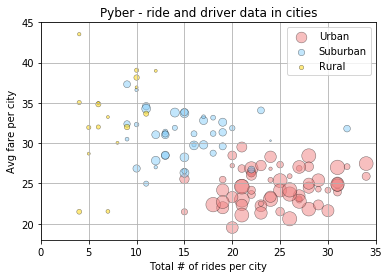

In [25]:
#create bubble plots using variables from 3 data frames 

plt.scatter(urban_rides, urban_avg_fare, marker="o", facecolors="lightcoral",
            s=urban_drivers*3, alpha=.5, edgecolors="black", label = "Urban", linewidth = .5)
plt.scatter(suburban_rides, suburban_avg_fare, marker="o", facecolors="lightskyblue",
            s=suburban_drivers*3, alpha=.5, edgecolors="black", label = "Suburban", linewidth = .5)
plt.scatter(rural_rides, rural_avg_fare, marker="o", facecolors="gold",
            s=rural_drivers*3, alpha=.50, edgecolors="black", label = "Rural", linewidth = .5)

plt.xlim(0, 35)
plt.ylim(18,45)
plt.grid()
plt.ylabel("Avg fare per city")
plt.xlabel("Total # of rides per city")
plt.title("Pyber - ride and driver data in cities")
plt.legend( loc="best")
plt.savefig("Pyber - BubblePlot.png")
plt.show()


In [10]:
#groupby city type to get the total fares per city type and percent fares per city type

city_type_groups = city_data_clean_indexed.groupby("type")
fares_type = city_type_groups["total_fares"].sum()
total_fares = city_data_clean_indexed["total_fares"].sum()
percent_fares = (fares_type/total_fares)*100
percent_fares

type
Rural        6.68500
Suburban    30.34954
Urban       62.96546
Name: total_fares, dtype: float64

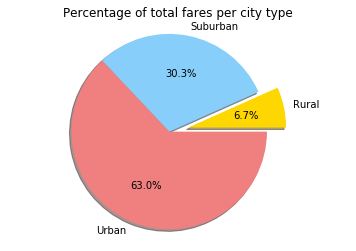

In [11]:
#Create pie chart to show percent total fares per city type 

explode = (.2,0,0)
colors = ['gold', 'lightskyblue', 'lightcoral']
pies = ["Rural", "Suburban","Urban"]

fig1, ax1 = plt.subplots()
ax1.pie(percent_fares, explode=explode, labels=pies \
       , autopct="%1.1f%%", shadow=True, startangle=0, colors=colors)
ax1.axis('equal') 
plt.title("Percentage of total fares per city type")
plt.show()


In [12]:
# Use groupby city type to find total rides and percent rides per city type

rides_type = city_type_groups["ride_count"].sum()
total_rides = city_data_clean_indexed["ride_count"].sum()
percent_rides = (rides_type/total_rides)*100
percent_rides

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_count, dtype: float64

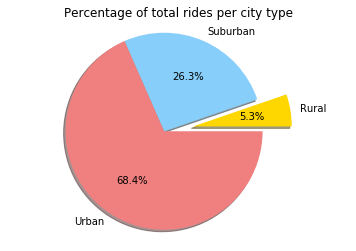

In [13]:
#Create pie chart to show percent total rides per city type 

explode = (.3,0,0)
colors = ['gold', 'lightskyblue', 'lightcoral']
pies = ["Rural", "Suburban","Urban"]

fig1, ax1 = plt.subplots()
ax1.pie(percent_rides, explode=explode, labels=pies \
       , autopct="%1.1f%%", shadow=True, startangle=0, colors=colors)
ax1.axis('equal') 
plt.title("Percentage of total rides per city type")
plt.show()

In [14]:
# Use groupby city type to find total drivers and percent drivers per city type

drivers_type = city_type_groups["driver_count"].sum()
total_drivers = city_data_clean_indexed["driver_count"].sum()
percent_drivers = (drivers_type/total_drivers)*100

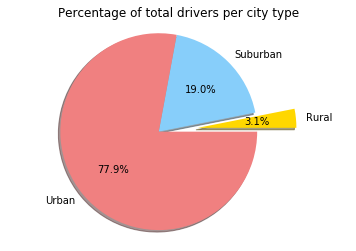

In [15]:
#Create pie chart to show percent total drivers per city type

explode = (.4,0,0)
colors = ['gold', 'lightskyblue', 'lightcoral']
pies = ["Rural", "Suburban","Urban"]

fig1, ax1 = plt.subplots()
ax1.pie(percent_drivers, explode=explode, labels=pies \
       , autopct="%1.1f%%", shadow=True, startangle=0, colors=colors)
ax1.axis('equal') 
plt.title("Percentage of total drivers per city type")
plt.show()